In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the 'torch' module
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR100
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split, ConcatDataset
import torchvision.transforms as tt

In [5]:
stats = ((0.5074,0.4867,0.4411),(0.2011,0.1987,0.2025))
train_transform = tt.Compose([
    tt.RandomHorizontalFlip(),
    tt.RandomCrop(32, padding=4, padding_mode="reflect"),
    tt.ToTensor(),
    tt.Normalize(*stats)
])

test_transform = tt.Compose([
    tt.ToTensor(),
    tt.Normalize(*stats)
])

In [6]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10

# CIFAR-10 için mean ve std değerleri
cifar10_stats = ((0.4914, 0.4822, 0.4465),  # mean (RGB)
                 (0.2023, 0.1994, 0.2010))  # std

# Eğitim verisi için augmentation ve normalizasyon
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize(*cifar10_stats)
])

# Test verisi için sadece normalize
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(*cifar10_stats)
])

# CIFAR-10 veri setini indir
train_dataset = datasets.CIFAR10(root='./data', train=True, download=False, transform=train_transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=False, transform=test_transform)

# DataLoader ayarları
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=2, pin_memory=True)


In [8]:
from torchvision.datasets import CIFAR10

train_data = CIFAR10(root="./data", train=True, download=True, transform=train_transform)
test_data = CIFAR10(root="./data", train=False, download=True, transform=test_transform)


Files already downloaded and verified
Files already downloaded and verified


In [9]:
for image, label in train_data:
    print("Image shape: ",image.shape)
    print("Image tensor: ", image)
    print("Label: ", label)
    break


Image shape:  torch.Size([3, 32, 32])
Image tensor:  tensor([[[-2.4291, -2.4291, -2.4291,  ..., -0.1029, -0.0835, -0.0253],
         [-2.4291, -2.4291, -2.4291,  ...,  0.0716,  0.1104,  0.2073],
         [-2.4291, -2.4291, -2.4291,  ..., -0.0641,  0.1297,  0.2073],
         ...,
         [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
         [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
         [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291]],

        [[-2.4183, -2.4183, -2.4183,  ..., -0.8842, -0.9039, -0.9039],
         [-2.4183, -2.4183, -2.4183,  ..., -0.7662, -0.7662, -0.6876],
         [-2.4183, -2.4183, -2.4183,  ..., -0.9629, -0.7859, -0.6876],
         ...,
         [-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183],
         [-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183],
         [-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183]],

        [[-2.2214, -2.2214, -2.2214,  ..., -1.4410, -1.5190, -1

In [10]:
train_classes_items = dict()

for train_item in train_data:
    label = train_data.classes[train_item[1]]
    if label not in train_classes_items:
        train_classes_items[label] = 1
    else:
        train_classes_items[label] += 1

train_classes_items

{'frog': 5000,
 'truck': 5000,
 'deer': 5000,
 'automobile': 5000,
 'bird': 5000,
 'horse': 5000,
 'ship': 5000,
 'cat': 5000,
 'dog': 5000,
 'airplane': 5000}

In [11]:
BATCH_SIZE = 128
train_dl = DataLoader(train_data, BATCH_SIZE, num_workers=4, pin_memory=True, shuffle=True)
test_dl = DataLoader(test_data, BATCH_SIZE, num_workers=4, pin_memory=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.71453285..1.8768656].


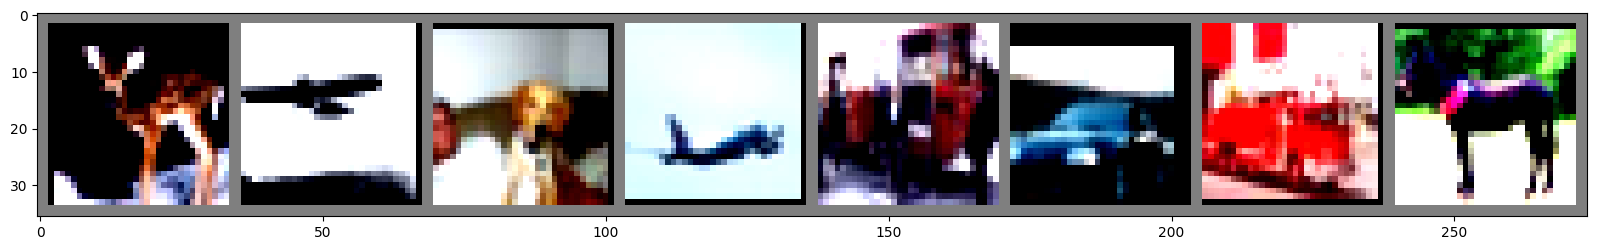

deer                airplane            dog                 airplane            truck               automobile          truck               horse               


In [12]:
# for 8 images
train_8_samples = DataLoader(train_data, 8, num_workers=4, pin_memory=True, shuffle=True)

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize = (20,20))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_8_samples)
# Use next(dataiter) instead of dataiter.next()
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print(''.join(f'{train_data.classes[labels[j]]:20s}' for j in range(8)))

In [13]:
def get_device():
    if torch.cuda.is_available():
        return torch.device("cuda")
    return torch.device("cpu")

def to_device(data,device):
    if isinstance(data,(list,tuple)):
        return [to_device(x,device) for x in data]
    return data.to(device,non_blocking=True)


class ToDeviceLoader:
    def __init__(self,data,device):
        self.data = data
        self.device = device

    def __iter__(self):
        for batch in self.data:
            yield to_device(batch,self.device)

    def __len__(self):
        return len(self.data)

In [14]:
device = get_device()
print(device)

train_dl = ToDeviceLoader(train_dl, device)
test_dl = ToDeviceLoader(test_dl, device)

cuda


In [15]:
def accuracy(predicted, actual):
    _, predictions = torch.max(predicted, dim=1)
    return torch.tensor(torch.sum(predictions==actual).item()/len(predictions))

In [17]:
class BaseModel(nn.Module):
    def training_step(self,batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out,labels)
        return loss

    def validation_step(self,batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out,labels)
        acc = accuracy(out,labels)
        return {"val_loss":loss.detach(),"val_acc":acc}

    def validation_epoch_end(self,outputs):
        batch_losses = [loss["val_loss"] for loss in outputs]
        loss = torch.stack(batch_losses).mean()
        batch_accuracy = [accuracy["val_acc"] for accuracy in outputs]
        acc = torch.stack(batch_accuracy).mean()
        return {"val_loss":loss.item(),"val_acc":acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [18]:
def conv_shortcut(in_channel, out_channel, stride):
    layers = [nn.Conv2d(in_channel, out_channel, kernel_size=(1,1), stride=(stride, stride)),
             nn.BatchNorm2d(out_channel)]
    return nn.Sequential(*layers)

def block(in_channel, out_channel, k_size,stride, conv=False):
    layers = None

    first_layers = [nn.Conv2d(in_channel,out_channel[0], kernel_size=(1,1),stride=(1,1)),
                    nn.BatchNorm2d(out_channel[0]),
                    nn.ReLU(inplace=True)]
    if conv:
        first_layers[0].stride=(stride,stride)

    second_layers = [nn.Conv2d(out_channel[0], out_channel[1], kernel_size=(k_size, k_size), stride=(1,1), padding=1),
                    nn.BatchNorm2d(out_channel[1])]

    layers = first_layers + second_layers

    return nn.Sequential(*layers)


class ResNet(BaseModel):

    def __init__(self, in_channels, num_classes):
        super().__init__()

        self.stg1 = nn.Sequential(
                                   nn.Conv2d(in_channels=in_channels, out_channels=64, kernel_size=(3),
                                             stride=(1), padding=1),
                                   nn.BatchNorm2d(64),
                                   nn.ReLU(inplace=True),
                                   nn.MaxPool2d(kernel_size=3, stride=2))

        ##stage 2
        self.convShortcut2 = conv_shortcut(64,256,1)

        self.conv2 = block(64,[64,256],3,1,conv=True)
        self.ident2 = block(256,[64,256],3,1)


        ##stage 3
        self.convShortcut3 = conv_shortcut(256,512,2)

        self.conv3 = block(256,[128,512],3,2,conv=True)
        self.ident3 = block(512,[128,512],3,2)


        ##stage 4
        self.convShortcut4 = conv_shortcut(512,1024,2)

        self.conv4 = block(512,[256,1024],3,2,conv=True)
        self.ident4 = block(1024,[256,1024],3,2)


        ##Classify
        self.classifier = nn.Sequential(
                                       nn.AvgPool2d(kernel_size=(4)),
                                       nn.Flatten(),
                                       nn.Linear(1024, num_classes))

    def forward(self,inputs):
        out = self.stg1(inputs)

        #stage 2
        out = F.relu(self.conv2(out) + self.convShortcut2(out))
        out = F.relu(self.ident2(out) + out)
        out = F.relu(self.ident2(out) + out)
        out = F.relu(self.ident2(out) + out)

        #stage3
        out = F.relu(self.conv3(out) + (self.convShortcut3(out)))
        out = F.relu(self.ident3(out) + out)
        out = F.relu(self.ident3(out) + out)
        out = F.relu(self.ident3(out) + out)
        out = F.relu(self.ident3(out) + out)

        #stage4
        out = F.relu(self.conv4(out) + (self.convShortcut4(out)))
        out = F.relu(self.ident4(out) + out)
        out = F.relu(self.ident4(out) + out)
        out = F.relu(self.ident4(out) + out)
        out = F.relu(self.ident4(out) + out)
        out = F.relu(self.ident4(out) + out)
        out = F.relu(self.ident4(out) + out)

        #Classify
        out = self.classifier(out)#100x1024

        return out


In [15]:
import torchvision.models as models


class DenseNetModel(BaseModel):
    def __init__(self, num_classes):
        super().__init__()
        # pretrained=False yerine weights=None kullan
        self.network = models.densenet121(weights=None)
        self.network.classifier = nn.Linear(self.network.classifier.in_features, num_classes)

    def forward(self, xb):
        return self.network(xb)


In [16]:
model = DenseNetModel(num_classes=100)
model = to_device(model, device)  # cihazına (CPU/GPU) gönder

In [50]:
import torch.nn.functional as F
import torch.nn as nn
import torchvision.models as models

class WideResNetModel(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.network = models.wide_resnet50_2(weights=None)
        self.network.fc = nn.Linear(self.network.fc.in_features, num_classes)

    def forward(self, xb):
        return self.network(xb)

    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print(f"Epoch [{epoch+1}], val_loss: {result['val_loss']:.4f}, val_acc: {result['val_acc']:.4f}")
    def accuracy(outputs, labels):
        _, preds = torch.max(outputs, dim=1)
        return torch.tensor(torch.sum(preds == labels).item() / len(preds))



In [51]:
# Modeli oluştur ve cihazına (GPU/CPU) gönder
model = WideResNetModel(num_classes=100)
model = to_device(model, device)  # to_device fonksiyonun zaten varsa böyle kullanabilirsin


In [19]:
model = ResNet(3,10)

In [20]:
model = to_device(model, device)


In [21]:
@torch.no_grad()
def evaluate(model, test_dl):
    model.eval()
    outputs = [model.validation_step(batch) for batch in test_dl]
    return model.validation_epoch_end(outputs)

In [22]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit (epochs, train_dl, test_dl, model, optimizer, max_lr, weight_decay, scheduler, grad_clip=None):
    torch.cuda.empty_cache()

    history = []

    optimizer = optimizer(model.parameters(), max_lr, weight_decay = weight_decay)

    scheduler = scheduler(optimizer, max_lr, epochs=epochs, steps_per_epoch=len(train_dl))

    for epoch in range(epochs):
        model.train()

        train_loss = []

        lrs = []

        for batch in train_dl:
            loss = model.training_step(batch)

            train_loss.append(loss)

            loss.backward()

            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            optimizer.step()
            optimizer.zero_grad()

            scheduler.step()
            lrs.append(get_lr(optimizer))
        result = evaluate(model, test_dl)
        result["train_loss"] = torch.stack(train_loss).mean().item()
        result["lrs"] = lrs

        model.epoch_end(epoch,result)
        history.append(result)

    return history


In [23]:
epochs = 150
optimizer = torch.optim.Adam
max_lr = 1e-3
grad_clip = 0.1
weight_decay = 1e-5
scheduler = torch.optim.lr_scheduler.OneCycleLR

In [24]:
%%time
history = fit(epochs=epochs, train_dl=train_dl, test_dl=test_dl, model=model,
              optimizer=optimizer, max_lr=max_lr, grad_clip=grad_clip,
              weight_decay=weight_decay, scheduler=torch.optim.lr_scheduler.OneCycleLR)

Epoch [0], last_lr: 0.00004, train_loss: 1.6182, val_loss: 1.7197, val_acc: 0.3881
Epoch [1], last_lr: 0.00004, train_loss: 1.2608, val_loss: 1.4705, val_acc: 0.4723
Epoch [2], last_lr: 0.00005, train_loss: 1.0976, val_loss: 1.4177, val_acc: 0.5078
Epoch [3], last_lr: 0.00006, train_loss: 0.9716, val_loss: 1.3561, val_acc: 0.5418
Epoch [4], last_lr: 0.00007, train_loss: 0.8816, val_loss: 1.3038, val_acc: 0.5545
Epoch [5], last_lr: 0.00008, train_loss: 0.7913, val_loss: 1.2481, val_acc: 0.5601
Epoch [6], last_lr: 0.00010, train_loss: 0.7372, val_loss: 1.1395, val_acc: 0.6263
Epoch [7], last_lr: 0.00011, train_loss: 0.6794, val_loss: 1.0127, val_acc: 0.6539
Epoch [8], last_lr: 0.00013, train_loss: 0.6429, val_loss: 1.0360, val_acc: 0.6281
Epoch [9], last_lr: 0.00015, train_loss: 0.5937, val_loss: 0.9325, val_acc: 0.6666
Epoch [10], last_lr: 0.00017, train_loss: 0.5764, val_loss: 0.9154, val_acc: 0.7079
Epoch [11], last_lr: 0.00020, train_loss: 0.5430, val_loss: 0.8634, val_acc: 0.7209
Ep

In [25]:
def plot_acc(history):
    plt.plot([x["val_acc"] for x in history],"-x")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")

def plot_loss(history):
    plt.plot([x.get("train_loss") for x in history], "-bx")
    plt.plot([x["val_loss"] for x in history],"-rx")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train loss","val loss"])

def plot_lrs(history):
    plt.plot(np.concatenate([x.get("lrs",[]) for x in history]))
    plt.xlabel("Batch number")
    plt.ylabel("Learning rate")

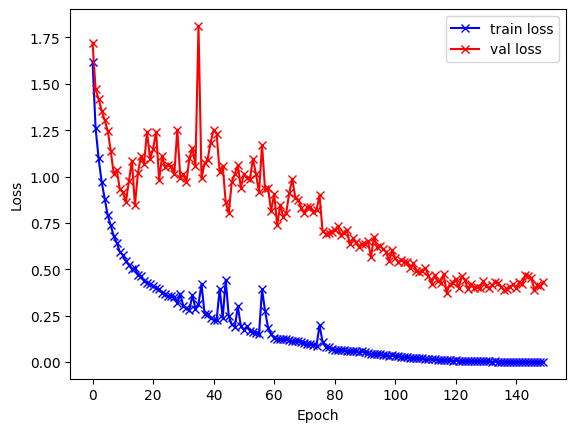

In [26]:
plot_loss(history)

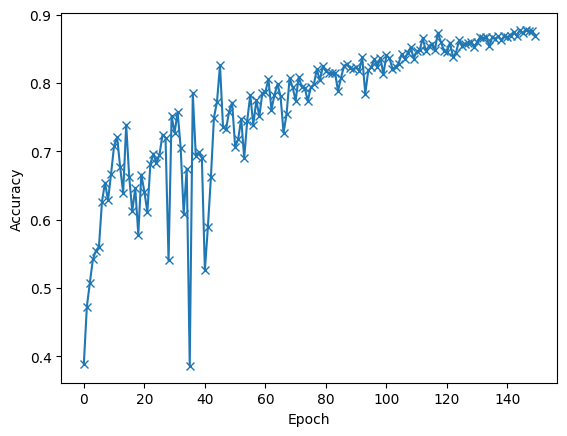

In [27]:
plot_acc(history)

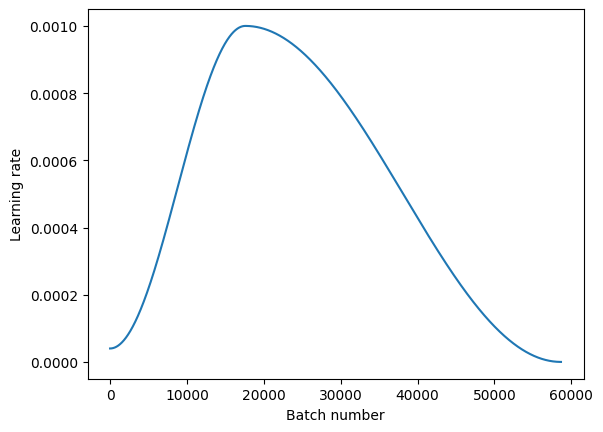

In [28]:
plot_lrs(history)

In [29]:
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return test_data.classes[preds[0].item()]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1770618..2.6952004].


Label: cat , Predicted: cat


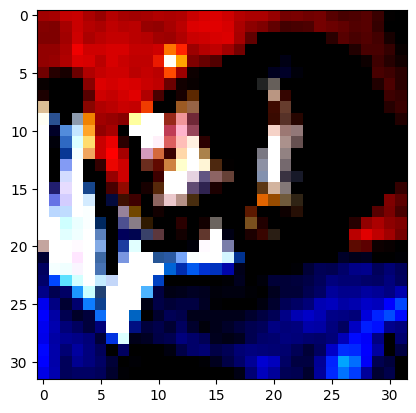

In [30]:
img, label = test_data[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_data.classes[label], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8282496..2.7147107].


Label: ship , Predicted: ship


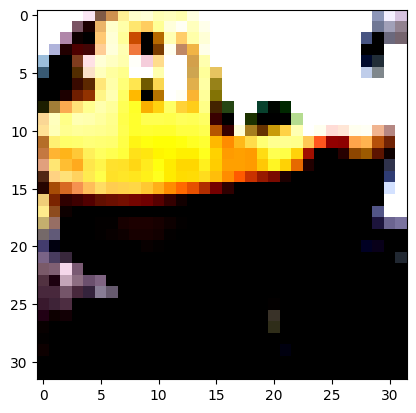

In [31]:
img, label = test_data[1002]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_data.classes[label], ', Predicted:', predict_image(img, model))

In [47]:
torch.save(model.state_dict(), 'cifar100-resnet-project.pth')

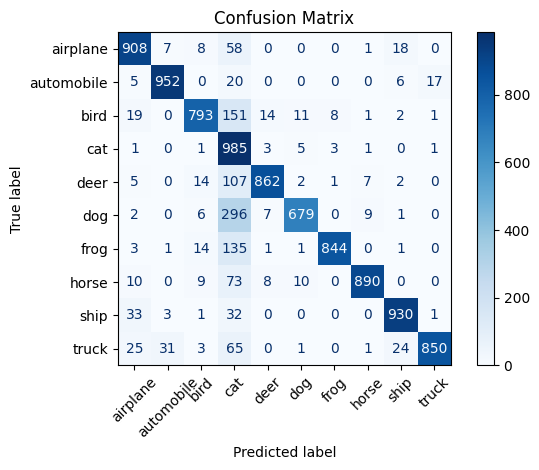

Classification Report (F1 Score dahil):
              precision    recall  f1-score   support

    airplane       0.90      0.91      0.90      1000
  automobile       0.96      0.95      0.95      1000
        bird       0.93      0.79      0.86      1000
         cat       0.51      0.98      0.67      1000
        deer       0.96      0.86      0.91      1000
         dog       0.96      0.68      0.79      1000
        frog       0.99      0.84      0.91      1000
       horse       0.98      0.89      0.93      1000
        ship       0.95      0.93      0.94      1000
       truck       0.98      0.85      0.91      1000

    accuracy                           0.87     10000
   macro avg       0.91      0.87      0.88     10000
weighted avg       0.91      0.87      0.88     10000



In [49]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import torch

# Tahminleri ve gerçek etiketleri toplama fonksiyonu
def get_all_preds(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch in dataloader:
            images, labels = batch
            outputs = model(images)
            _, preds = torch.max(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return all_labels, all_preds

# Değerlendirme
y_true, y_pred = get_all_preds(model, test_dl)

# Sınıf isimleri CIFAR-10 için:
class_names = test_data.classes  # Eğer 10 sınıf varsa ['airplane', 'automobile', ..., 'truck']

# Confusion Matrix
labels = list(range(len(class_names)))  # [0,1,2,...,9]

cm = confusion_matrix(y_true, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Classification Report (F1, Precision, Recall)
print("Classification Report (F1 Score dahil):")
print(classification_report(y_true, y_pred, labels=labels, target_names=class_names))

